# Hepstat_Tutorial_Fit
Fit example.




**Author:** Lailin XU  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Monday, March 29, 2021 at 01:18 AM.</small></i>

Import the ROOT libraries

In [1]:
import ROOT as R
R.gROOT.SetStyle("ATLAS")

Welcome to JupyROOT 6.22/07


Generate some toy data, assuming the model is y = m*x + b. Then define a histogram to save the data.

In [2]:
m = 11.
b = 2.5
bin0, bin1=0, 5
nbins = bin1-bin0

fl = R.TF1("flinear", "pol1", bin0, bin1)
fl.SetParameters(0, b)
fl.SetParameters(1, m)

hname = "test_data"
hd = R.TH1F(hname, hname, nbins, bin0, bin1)
hd.Sumw2()
hd.FillRandom("flinear", 200) 

d.FillRandom("flinear", 20) 

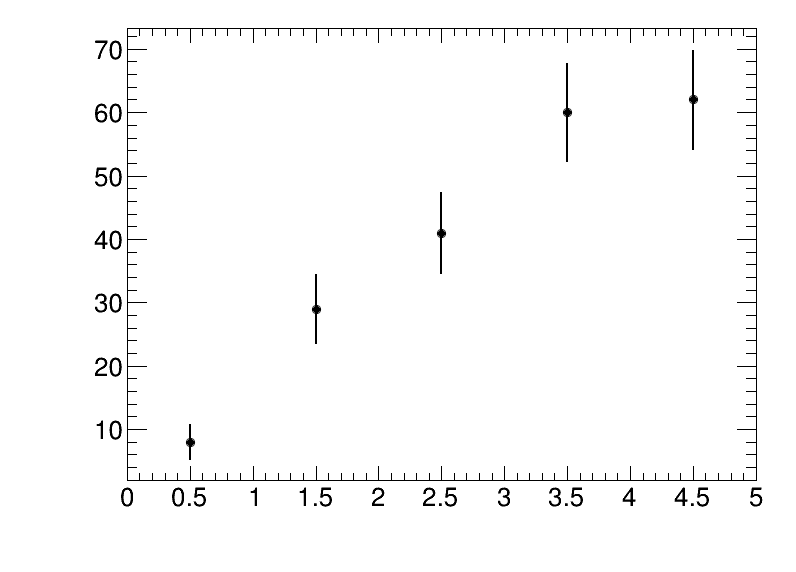

In [3]:
myc = R.TCanvas("c", "c", 800, 600)
myc.SetFillColor(0)

myc.cd()
hd.Draw()
myc.Draw()

Do a fitting. By default ROOT uses Chi-square fit

In [4]:
my1 = R.TF1("myFunc1", "pol1", bin0, bin1)
my1.SetLineColor(4)

frp1 = hd.Fit("myFunc1", "S")
myc.Update()
myc.SaveAs("test_fitting_1.png")


****************************************
Minimizer is Linear / Migrad
Chi2                      =      2.43795
NDf                       =            3
p0                        =      1.71809   +/-   3.1885      
p1                        =      15.1177   +/-   1.66766     


Info in <TCanvas::Print>: png file test_fitting_1.png has been created


Now do a likelihood fit

 FCN=1.21602 FROM MIGRAD    STATUS=CONVERGED     157 CALLS         158 TOTAL
                     EDM=4.672e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.93421e+00   3.65636e+00   2.06054e-03  -2.05085e-06
   2  p1           1.52263e+01   1.81514e+00   1.02238e-03  -4.08006e-05
                               ERR DEF= 0.5

****************************************
Minimizer is Minuit / Migrad
MinFCN                    =      1.21602
Chi2                      =      2.47176
NDf                       =            3
Edm                       =    4.672e-09
NCalls                    =          158
p0                        =      1.93421   +/-   3.65636     
p1                        =      15.2263   +/-   1.81514     

Covariance Matrix:

            	          p0          p1
p0          	      13.369     -5.1922
p1          	 

Info in <TCanvas::Print>: png file test_fitting_2.png has been created
Info in <TCanvas::Print>: png file test_fitting_3.png has been created


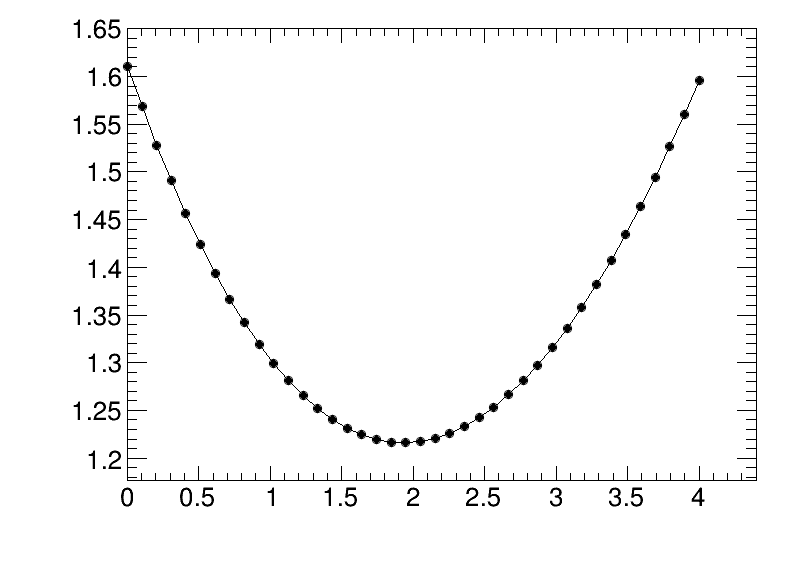

In [5]:
my2 = R.TF1("myFunc2", "pol1", bin0, bin1)
my2.SetLineColor(2)
frp2 = hd.Fit("myFunc2", "LS")
my1.Draw("same")
myc.Update()
myc.SaveAs("test_fitting_2.png")

myc.Clear()
frp2.Print("V")
gr=R.TGraph()
smin, smax=0, 4
fr2=R.TFitResult(frp2.Get())
fr2.Print()
fr2.Scan(0, gr, smin, smax)
gr.Draw()
gr.Print()
myc.Draw()

myc.SaveAs("test_fitting_3.png")

Draw all canvases 

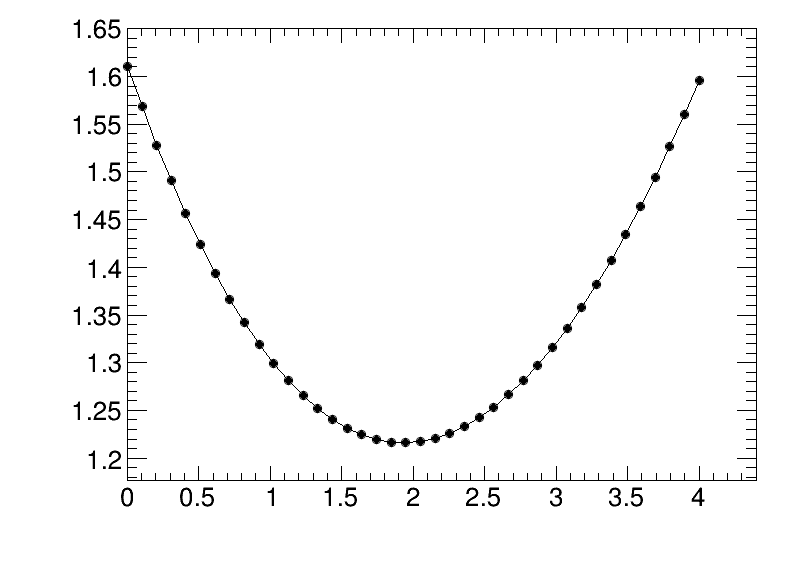

In [6]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()